# Decision Tree

Imagine you are a data analyst at a telecom company. The marketing department has noticed an increase in customer churn and needs your help to identify which customers are most likely to leave next month.

**Customer churn** refers to when a customer stops doing business with a company. 

#### Dataset Description
We will use a synthetic dataset for this exercise. The dataset contains the following columns:

  • **CustomerID:** A unique identifier for each customer.
  • **Age:** The age of the customer.
  • **MonthlyCharge:** The monthly bill amount for the customer.
  • **CustomerServiceCalls:** The number of times the customer contacted customer service.
  • **Churn:** This is our target variable, indicating whether the customer churned (Yes) or not (No).

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import warnings  # To manage warning messages
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.tree import DecisionTreeClassifier  # For creating and training the Decision Tree model
from sklearn.metrics import accuracy_score  # For evaluating the model's accuracy
from sklearn import tree  # For plotting the decision tree

# Ignore any warning messages to keep the output clean
warnings.filterwarnings('ignore')

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.22.4)
  from scipy.sparse import csr_matrix, issparse


In [2]:
# Creating a synthetic dataset
# This dataset simulates customer data for a telecom company
data = {
    'CustomerID': range(1, 101),  # Unique ID for each customer
    'Age': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]*10,  # Customer age (10 distinct values repeated for 100 customers)
    'MonthlyCharge': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]*10,  # Monthly bill (10 distinct values repeated)
    'CustomerServiceCalls': [1, 2, 3, 4, 0, 1, 2, 3, 4, 0]*10,  # Number of customer service calls made by customers
    'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']*10  # Whether a customer churned (Yes/No)
}
# Converting the data into a pandas DataFrame for easier manipulation
df = pd.DataFrame(data)

print(df)

    CustomerID  Age  MonthlyCharge  CustomerServiceCalls Churn
0            1   20             50                     1    No
1            2   25             60                     2    No
2            3   30             70                     3   Yes
3            4   35             80                     4    No
4            5   40             90                     0   Yes
..         ...  ...            ...                   ...   ...
95          96   45            100                     1    No
96          97   50            110                     2   Yes
97          98   55            120                     3   Yes
98          99   60            130                     4    No
99         100   65            140                     0   Yes

[100 rows x 5 columns]


In [3]:
# Splitting the dataset into features (X) and target variable (y)
# Features are the independent variables used to predict churn (dependent variable)
X = df[['Age', 'MonthlyCharge', 'CustomerServiceCalls']]  # Features used for prediction
y = df['Churn']  # Target variable indicating if the customer churned

print(X)

    Age  MonthlyCharge  CustomerServiceCalls
0    20             50                     1
1    25             60                     2
2    30             70                     3
3    35             80                     4
4    40             90                     0
..  ...            ...                   ...
95   45            100                     1
96   50            110                     2
97   55            120                     3
98   60            130                     4
99   65            140                     0

[100 rows x 3 columns]


In [4]:
print(y)

0      No
1      No
2     Yes
3      No
4     Yes
     ... 
95     No
96    Yes
97    Yes
98     No
99    Yes
Name: Churn, Length: 100, dtype: object


In [5]:
# Splitting the dataset into training and testing sets
# 70% of the data is used for training the model, and 30% is for testing its performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Training the Decision Tree model
clf = DecisionTreeClassifier()  # Initialize the Decision Tree classifier
clf.fit(X_train, y_train)  # Train the model on the training data; .fit() method is used to commence the training 

DecisionTreeClassifier()

In [7]:
# Making predictions on the test set
y_pred = clf.predict(X_test)  # Predict churn for the test data

In [9]:
# Evaluating the model using accuracy
# Accuracy is the proportion of correct predictions out of total predictions
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
print(f'Model Accuracy: {accuracy}')  # Print the accuracy score

Model Accuracy: 1.0


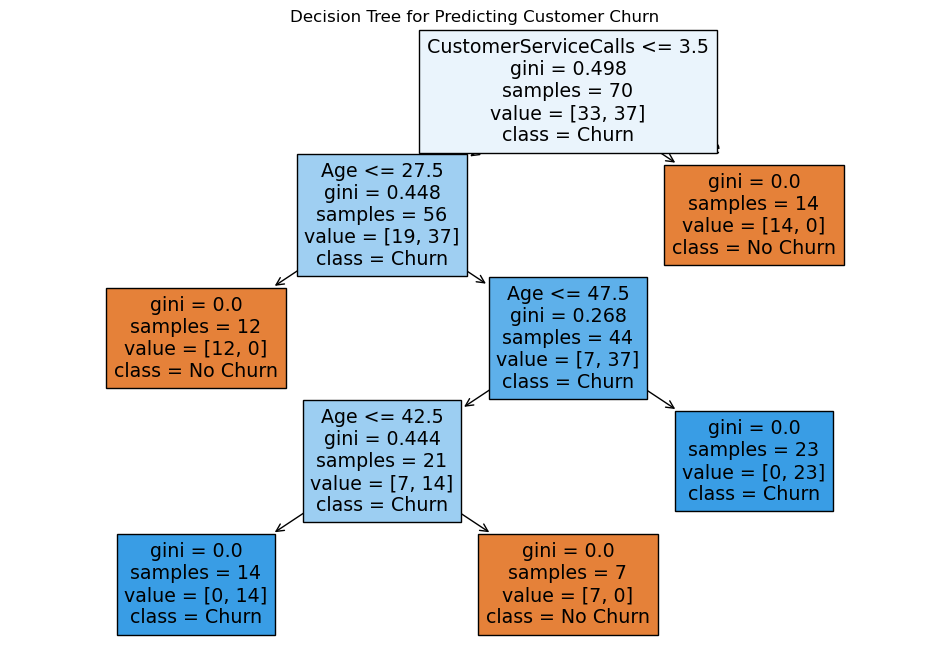

In [12]:
# Visualizing the decision tree
# This visualization helps in understanding the decision-making process of the model
plt.figure(figsize=(12,8))  # Set the size of the plot
tree.plot_tree(clf, filled=True,  # Plot the decision tree, with color-coding for nodes
               feature_names=['Age', 'MonthlyCharge', 'CustomerServiceCalls'],  # Feature names to display
               class_names=['No Churn', 'Churn'])  # Class names (target values) to display
plt.title('Decision Tree for Predicting Customer Churn')  # Title for the plot
plt.show()  # Display the decision tree visualization

1. **Gini**
    • The Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
    • The Gini impurity ranges from 0 to 0.5, where 0 indicates that all elements in the subset belong to the same class (perfect purity), and 0.5 means the data is randomly distributed across various classes.
    • In decision trees, a lower Gini impurity is generally preferred as it indicates greater purity of the node.
2. **Samples**
    •  This value represents the number of samples (or records) that reach the node.
    •  It gives an idea of how much of the training data is affected by the conditions leading to this node.
    •  A high number of samples in a node means that the condition or rule associated with that node is relevant for a significant portion of the dataset.
3. **Value**
    •  This shows the distribution of the samples in different classes at that particular node.
    •  For a binary classification problem (like churn prediction with 'Yes' or 'No'), the value is presented as a list of two numbers. The first number indicates the count of samples in the first class, and the second number indicates the count of samples in the second class.
    • This distribution helps in understanding which class is predominant at a particular node.
4. **Class**
    • This indicates the class that would be predicted if the decision tree traversal ends at that node.
    • It is determined based on the majority class of the samples that reach the node. For instance, if most samples at a node belong to the 'No Churn' class, the node will predict 'No Churn'.
5. **Feature Name (e.g., 'Monthly Charge')**
    • This is not a standard part of the decision tree node description, but it may appear in the tree's branches.
    • It represents the feature (or attribute) used to split the data at that node.
    • For example, if you see "MonthlyCharge <= 80", it means that the tree is splitting the data at this node based on whether the monthly charge is less than or equal to 80.

#### Key Concepts

1. **Splitting the Dataset -** The dataset is divided into training and testing sets. Typically, 70% of the data is used for training the model, and the remaining 30% is reserved for testing.

2. **Training Data vs. Testing Data -** Training data is used to train the machine learning model. In contrast, testing data, which the model has not seen during training, is used to evaluate the model's performance and generalization ability.

3. **Model Training Process -** The process involves using a 'fit' method where the model is trained using features (X_train) and targets (Y_train). The testing data is not used in this stage.

4. **Prediction and Accuracy Assessment -** After training, the model makes predictions on the test data (X_test). These predictions are then compared with the actual outcomes (Y_test) to calculate the model's accuracy.